In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
thetaset = np.load('thetaset.npy')
saddleset = np.load('saddleset.npy')
rotangs = np.load('rotangs.npy')
alphabeta = np.load('alphabeta.npy') #Note the need to multiply 0.5 to the values in the loaded alphabeta
Evs = np.load('Evs.npy')
gamma, kappa = np.load('gammakappa.npy') #No need to multiply any combinatorial factors here
BWset = np.load('BWset.npy')

In [3]:
ival = 5 
Ev = Evs[ival]
thetai = thetaset[ival] * IN_RADIAN
rotang = rotangs[ival][0] * IN_RADIAN
alpha,beta = 0.5* alphabeta[ival]
kx0,ky0 = saddleset[ival]

In [4]:
X,Y,Z = data_for_contours(thetai=thetaset[ival])

### Generic Contour Plot

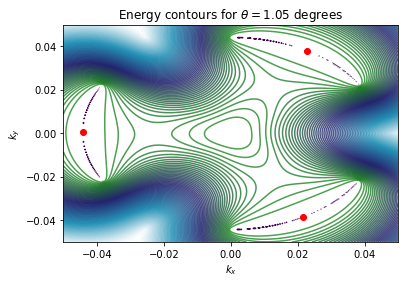

In [5]:
plt.contour(X,Y,Z, levels = 80,alpha=0.7,cmap='ocean')
plt.scatter(kx0,ky0,c='r')
kx120,ky120 = rot2D([kx0,ky0],2*np.pi/3)
plt.scatter(kx120,ky120,c='r')
kx240,ky240 = rot2D([kx0,ky0],4*np.pi/3)
plt.scatter(kx240,ky240,c='r')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.title("Energy contours for $\\theta = $" + str(int(thetaset[ival] * 100)/100) + ' degrees' )
plt.contour(X,Y,Z,[Ev],linestyles='dashed', alpha=1,)
#plt.savefig('FigsPoster/ContoursLog.jpg')

### Fermi Surface plot

Text(0.5, 1.0, 'Fermi surfaces showing a lifshitz transition for $\\theta = $1.05 degrees')

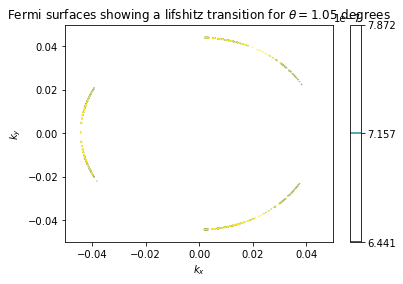

In [6]:
contour_set = [0.9*Ev,1*Ev,1.1*Ev]
#contour_set = np.linspace(0.8*Ev,1.2*Ev,3)
CS = plt.contour(X,Y,Z, contour_set)
plt.colorbar(CS)
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.title("Fermi surfaces showing a lifshitz transition for $\\theta = $" + str(int(thetaset[ival] * 100)/100) + ' degrees' )

### Seaborn Heatmaps

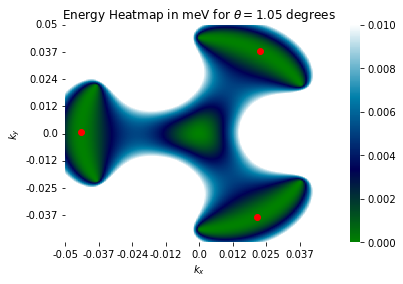

In [8]:
fig, ax = plt.subplots(1,1)
df = pd.DataFrame(Z[::-1])
df.columns = [int(xval *1000)/1000 for xval in X]
df.index = [int(yval *1000)/1000 for yval in Y][::-1]
sns.heatmap(df, vmin=0, vmax=0.01, fmt = '.3f', cmap = 'ocean', xticklabels=50, yticklabels=50)
ax.set_title("Energy Heatmap in meV for $\\theta = $" + str(int(thetaset[ival] * 100)/100) + ' degrees')
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
#ax.scatter(0,100,c='r',marker = '*')
xset = [kx0,kx120,kx240]
yset = [ky0,ky120,ky240]
for kxval,kyval in zip(xset,yset):
    spacingx = (np.amax(X) - np.amin(X) )/ len(X)
    xindex = (kxval - np.amin(X))/spacingx
    spacingy = (np.amax(Y) - np.amin(Y))/ len(Y)
    yindex = (-kyval - np.amin(Y))/spacingy
    ax.scatter(xindex,yindex,c='r',alpha = 1)

plt.savefig('FigsPoster/HeatmapMagic.jpg')